* Catalina Bedoya Lopéz
* Mariana Osorno
* Manuela Mejia

1**. Introducción al Aprendizaje Automático y Dataset de Películas**

---



El aprendizaje supervisado se ha implementado en la industria cinematográfica para prever el rendimiento de las películas, analizar tendencias y mejorar las decisiones relacionadas con la producción y el marketing. Entre sus aplicaciones más comunes se encuentran la predicción de ingresos en taquilla, la evaluación de la crítica, el análisis del público objetivo y la recomendación de contenidos. Utilizando modelos de regresión o clasificación, los estudios de cine pueden anticipar el éxito comercial de una película antes de su estreno, lo que les permite tomar decisiones fundamentadas sobre presupuestos, campañas de publicidad y estrategias de distribución. Respecto a las variables clave en un conjunto de datos relacionado con los ingresos y el éxito de una película, algunas de las más relevantes incluyen: el presupuesto, que puede afectar directamente la calidad de la producción y su capacidad de generar ingresos en taquilla; el género, que influye en el público y en las expectativas de éxito en ciertos mercados; el número de actores principales conocidos, ya que las estrellas de cine pueden atraer a más espectadores; las calificaciones de los críticos o las opiniones en plataformas de reseñas, que pueden impactar la percepción del público; y la estrategia de marketing (por ejemplo, la cantidad de promoción y distribución). Estas variables tienen un impacto directo en la percepción de la película y en su probabilidad de generar grandes ingresos, lo cual influye en las predicciones de éxito. Las principales variables que vamos a analizar en la regresión lineal sobre la recaudación (Gross) de la película son: el presupuesto, la puntuación en IMDB y la duración.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
dataset = pd.read_csv ('/content/movie_metadata.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0$,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0$,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0$,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0$,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0$,2009.0,11000.0,7.5,2.35,10000


In [6]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Limpieza de la base de datos

In [7]:
duplicados = dataset.duplicated().sum()
print(f'Duplicados encontrados:{duplicados}')

Duplicados encontrados:45


In [8]:
dataset.drop (['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
              'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
              'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link','language',
              'country', 'content_rating'], axis=1, inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4993 non-null   float64
 1   duration                 5028 non-null   float64
 2   director_facebook_likes  4939 non-null   float64
 3   actor_3_facebook_likes   5020 non-null   float64
 4   actor_1_facebook_likes   5036 non-null   float64
 5   gross                    4159 non-null   float64
 6   num_user_for_reviews     5022 non-null   float64
 7   budget                   5043 non-null   object 
 8   title_year               4935 non-null   float64
 9   actor_2_facebook_likes   5030 non-null   float64
 10  imdb_score               5043 non-null   float64
 11  aspect_ratio             4714 non-null   float64
 12  movie_facebook_likes     5043 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 512.3+ KB


In [10]:
dataset['movie_facebook_likes'] = dataset['movie_facebook_likes'].astype(float)

In [11]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4039 non-null   float64
 1   duration                 4039 non-null   float64
 2   director_facebook_likes  4039 non-null   float64
 3   actor_3_facebook_likes   4039 non-null   float64
 4   actor_1_facebook_likes   4039 non-null   float64
 5   gross                    4039 non-null   float64
 6   num_user_for_reviews     4039 non-null   float64
 7   budget                   4039 non-null   object 
 8   title_year               4039 non-null   float64
 9   actor_2_facebook_likes   4039 non-null   float64
 10  imdb_score               4039 non-null   float64
 11  aspect_ratio             4039 non-null   float64
 12  movie_facebook_likes     4039 non-null   float64
dtypes: float64(12), object(1)
memory usage: 441.8+ KB


In [12]:
dataset.isnull().sum()

,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_1_facebook_likes,0
gross,0
num_user_for_reviews,0
budget,0
title_year,0
actor_2_facebook_likes,0


# Visualización de variables


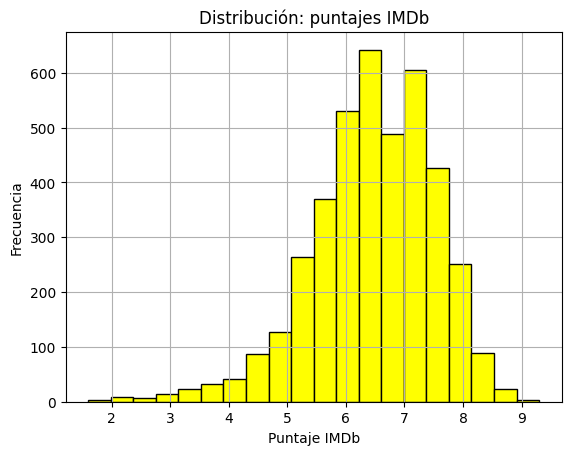

In [13]:
# Histograma de distribución de variable imdb_score.
plt.hist(dataset['imdb_score'], bins=20, edgecolor='black', color='yellow')
plt.title('Distribución: puntajes IMDb')
plt.xlabel('Puntaje IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [14]:
# Análisis de correlacion
dataset[['budget', 'imdb_score', 'duration','gross']].dtypes

,0
budget,object
imdb_score,float64
duration,float64
gross,float64


In [15]:
dataset['budget'] = dataset['budget'].str.replace('$', '').str.replace(',', '').astype(float)

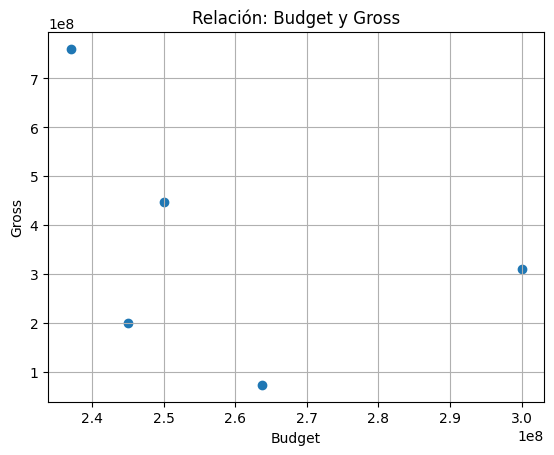

In [16]:
#Gráficos de dispersión


plt.scatter (dataset['budget'].head(5), dataset['gross'].head(5))
plt.title('Relación: Budget y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


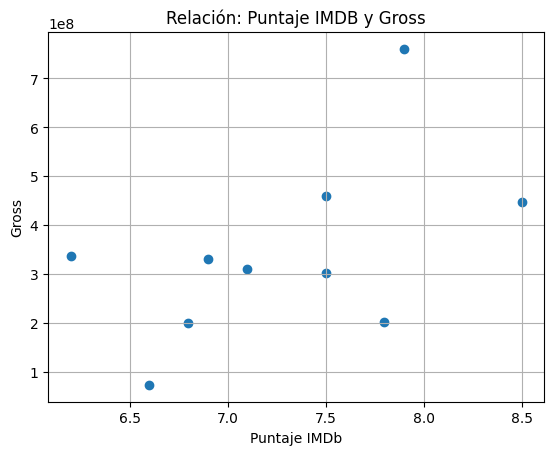

In [17]:
plt.scatter (dataset['imdb_score'].head(10), dataset['gross'].head(10))
plt.title('Relación: Puntaje IMDB y Gross')
plt.xlabel('Puntaje IMDb')
plt.grid(True)
plt.ylabel('Gross')
plt.show()


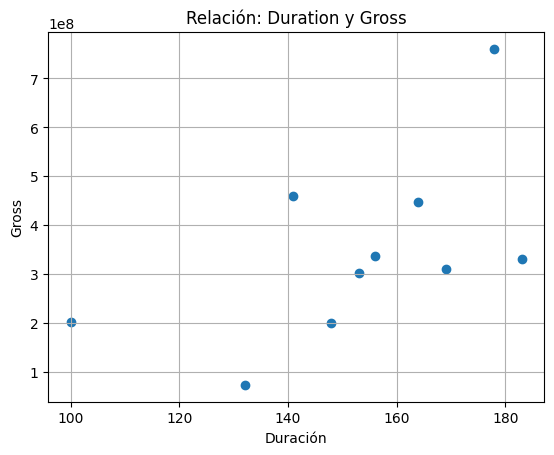

In [18]:
plt.scatter (dataset['duration'].head(10), dataset['gross'].head(10))
plt.title('Relación: Duration y Gross')
plt.xlabel('Duración')
plt.grid(True)
plt.ylabel('Gross')
plt.show()

In [19]:
# archivo limpio
dataset.to_csv('movies_clean.csv', index=False)

# 2. Regresión Lineal para la Predicción de Ingresos

---



In [20]:
dataset2 = pd.read_csv('/content/movies_clean.csv')
dataset2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4.039000e+03,4039.000000,4.039000e+03,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,162.816539,109.812082,767.403565,736.873484,7468.574895,4.980482e+07,320.855905,4.324237e+07,2003.176034,1928.713543,6.473211,2.106871,8960.967566
std,122.257783,22.400738,2986.239738,1832.377398,15161.174710,6.899171e+07,402.366687,2.182754e+08,9.923005,4419.293539,1.049527,0.349084,21044.015974
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,1.000000,0.000000e+00,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,74.000000,95.000000,10.000000,178.500000,722.000000,6.201256e+06,100.000000,8.000000e+06,1999.000000,360.000000,5.900000,1.850000,0.000000
50%,134.000000,106.000000,59.000000,423.000000,1000.000000,2.678172e+07,198.000000,2.200000e+07,2005.000000,660.000000,6.600000,2.350000,204.000000
75%,220.000000,120.000000,226.000000,681.000000,12000.000000,6.407557e+07,382.000000,5.000000e+07,2010.000000,968.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [21]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   4039 non-null   float64
 1   duration                 4039 non-null   float64
 2   director_facebook_likes  4039 non-null   float64
 3   actor_3_facebook_likes   4039 non-null   float64
 4   actor_1_facebook_likes   4039 non-null   float64
 5   gross                    4039 non-null   float64
 6   num_user_for_reviews     4039 non-null   float64
 7   budget                   4039 non-null   float64
 8   title_year               4039 non-null   float64
 9   actor_2_facebook_likes   4039 non-null   float64
 10  imdb_score               4039 non-null   float64
 11  aspect_ratio             4039 non-null   float64
 12  movie_facebook_likes     4039 non-null   float64
dtypes: float64(13)
memory usage: 410.3 KB


In [22]:
correlationm = dataset2.corr()
grosscorr = correlationm['gross'].sort_values(ascending=False)
print(grosscorr)

gross                      1.000000
num_user_for_reviews       0.554220
num_critic_for_reviews     0.472311
movie_facebook_likes       0.373839
actor_3_facebook_likes     0.305232
actor_2_facebook_likes     0.259020
duration                   0.250534
imdb_score                 0.200264
actor_1_facebook_likes     0.150824
director_facebook_likes    0.141494
budget                     0.106000
aspect_ratio               0.068000
title_year                 0.038961
Name: gross, dtype: float64


In [23]:
correlacion = dataset2[['num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']].corr()

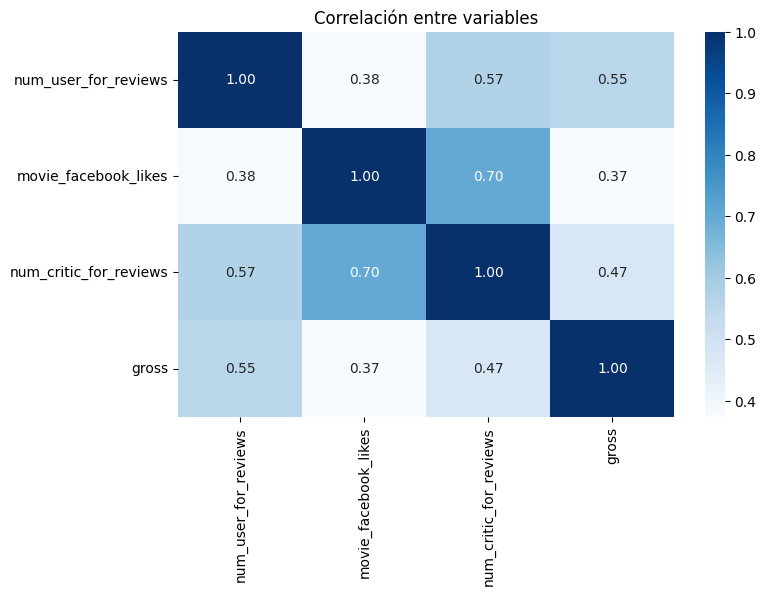

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

In [25]:
correlacion = dataset[['budget', 'gross', 'duration','imdb_score']].corr()
correlacion

,budget,gross,duration,imdb_score
budget,1.000000,0.106000,0.071037,0.027233
gross,0.106000,1.000000,0.250534,0.200264
duration,0.071037,0.250534,1.000000,0.360688
imdb_score,0.027233,0.200264,0.360688,1.000000


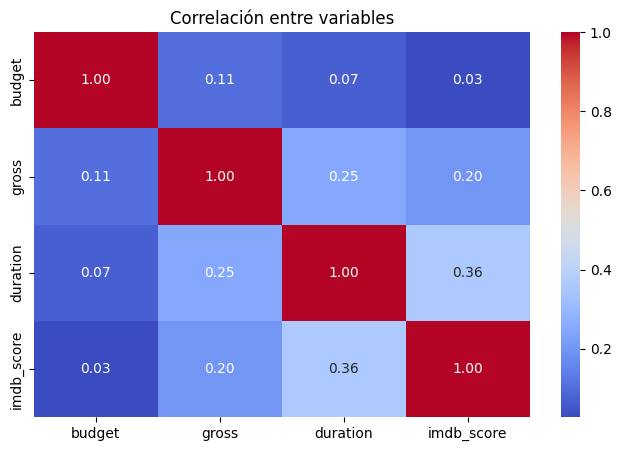

In [26]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

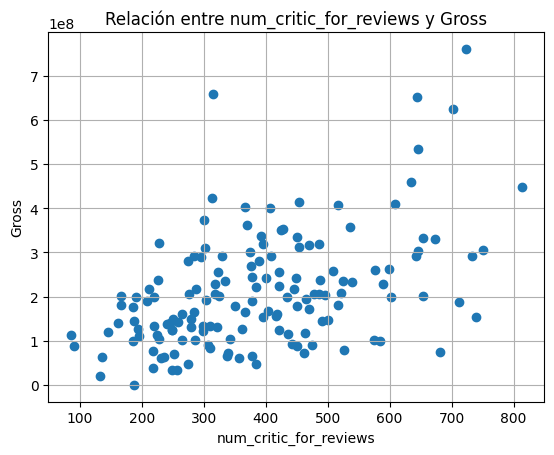

In [27]:
plt.scatter (dataset2['num_critic_for_reviews'].head(150), dataset2['gross'].head(150))
plt.title('Relación entre num_critic_for_reviews y Gross')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

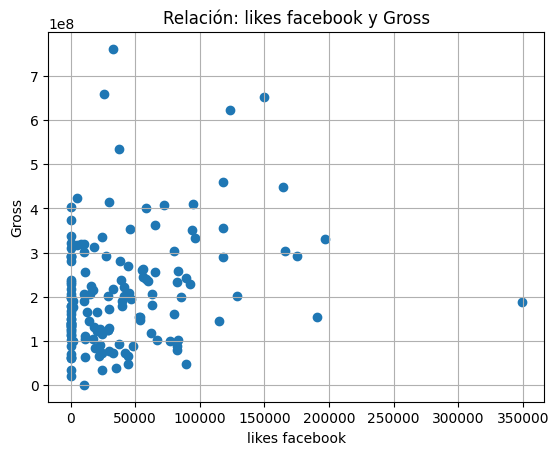

In [28]:

plt.scatter (dataset2['movie_facebook_likes'].head(150), dataset2['gross'].head(150))
plt.title('Relación: likes facebook y Gross')
plt.xlabel('likes facebook')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

# MODELO
El modelo aprende patrones de los datos proporcionados para predecir la recaudación.

Definir características (X) y etiqueta (y) (datos destacados anteriormente), diviendo el conjunto de datos en entrenamiento y prueba

In [29]:
X = dataset2[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = dataset2['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializar y entrenar
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("R² Score:", r2)


Error Absoluto Medio (MAE): 36251596.895499185
Error Cuadrático Medio (MSE): 3197701605711774.0
R² Score: 0.3954031525240511


**Interpretación los errores**

MAE de 36.2 millones no es tan malo, considerando que los valores de gross son del orden de 200 a 760 millones.
El error representa aproximadamente el 5% de la recaudación, lo cual es razonable.

El R² es 0.39, lo que sugiere que el modelo explica el % de la variabilidad en los ingresos brutos (gross)
en función de las características proporcionadas.

# Diagnóstico del modelo

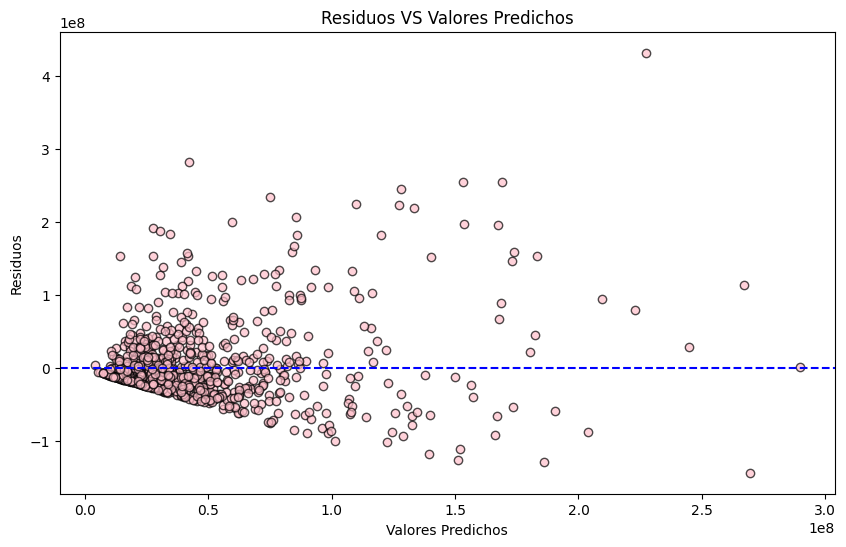

In [30]:
residuos = y_test - y_pred

# 1. Gráfico de residuos VS valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='pink', edgecolors='k', alpha=0.7)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuos VS Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')


plt.show()



Con este gráfico se analiza si se cumple homoscedasticidad, se observan muchos valores juntos y algunosos separados que sugieren una varianza mayor,
por lo que no se cumpliría homoscedasticidad para valores predichos más grandes

In [31]:
dw_stat = sm.stats.durbin_watson(residuos)
print("Durbin-Watson:", dw_stat)
# Interpretación:
# - Valor cercano a 2 indica independencia.
# - Valor cercano a 0 sugiere autocorrelación positiva.
# - Valor cercano a 4 sugiere autocorrelación negativa.

Durbin-Watson: 2.0029893363015083


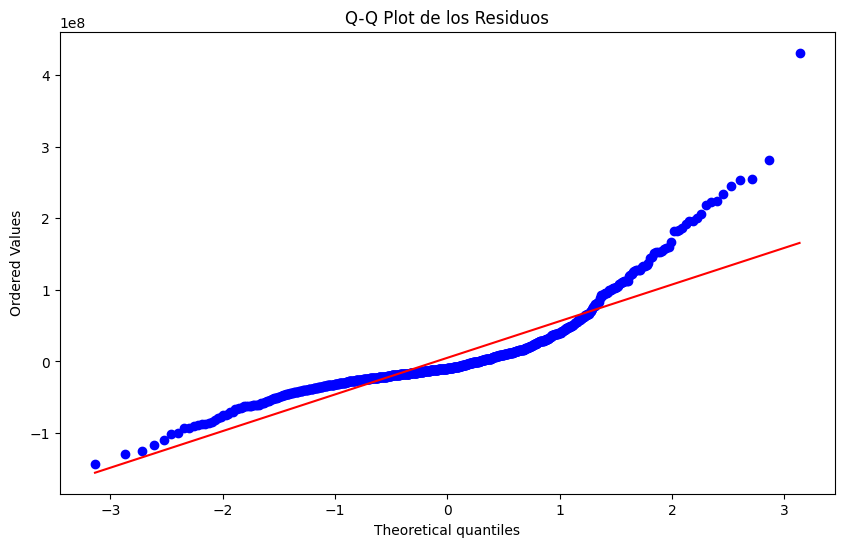

In [32]:
# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos')

plt.show()

# **3. Regresión Logística para Clasificación de Películas**

---



In [33]:
percentil_75 = dataset2['gross'].quantile(0.75)
dataset2['exito'] = dataset2['gross'].apply(lambda x: 1 if x > percentil_75 else 0)

# Definir variables predictoras y la variable dependiente
X = dataset2[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = dataset2['exito']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  exito   No. Observations:                 4039
Model:                          Logit   Df Residuals:                     4032
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.1548
Time:                        19:12:08   Log-Likelihood:                -1919.9
converged:                       True   LL-Null:                       -2271.5
Covariance Type:            nonrobust   LLR p-value:                1.234e-148
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8423      0.296     -9.603      0.000      -3.422      

De este procedimiento se pueden analizar variables significativas y no significativas:

Variables significativas: budget, duration, num_user_for_reviews, num_critic_for_reviwes son determinantes para el éxito.

Variables no significativas: Imdb_Score, num_facebook_lives no muestran relevancia estadística, lo cual podría indicar que el éxito depende más de factores internos del producto que de su percepción online.

In [34]:
# Predicción de probabilidades y clasificación
y_pred_prob = result.predict(X)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Cálculo de las métricas
precision = precision_score(y, y_pred_class)
recall = recall_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
accuracy = accuracy_score(y, y_pred_class)
auc = roc_auc_score(y, y_pred_prob)

print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"AUC: {auc:.2f}")

Precisión: 0.68
Sensibilidad (Recall): 0.27
F1 Score: 0.39
Exactitud (Accuracy): 0.79
AUC: 0.77


El modelo muestra un desempeño aceptable en precisión y exactitud, indicando que identifica correctamente una buena proporción de las películas clasificadas como exitosas y que su capacidad general es razonable. Sin embargo, la sensibilidad es baja, lo que implica que muchas películas exitosas no son reconocidas como tales

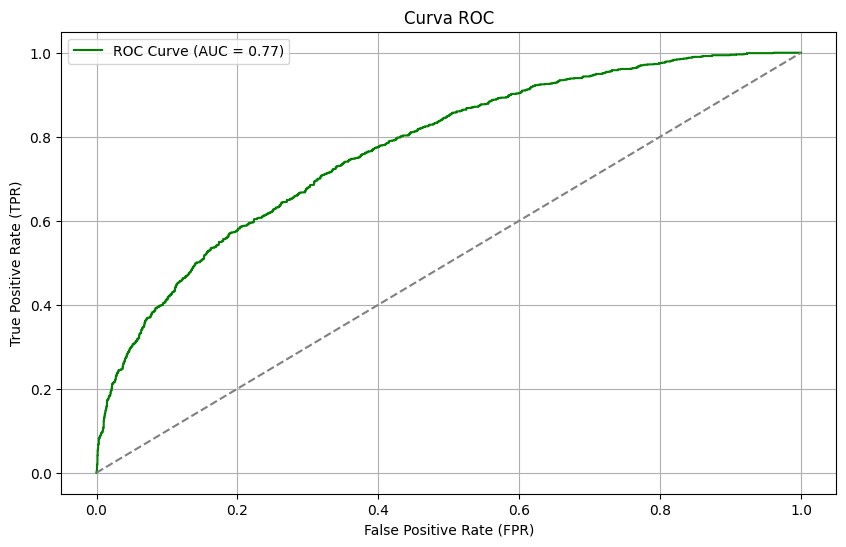

In [35]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

# 4. Afinamiento y evaluación avanzada de modelos

---



# 5. Extensión K-means para segmentación de películas

---



In [36]:
selected_features = ['budget','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']
data_selected = dataset2[selected_features]

# Estandarizar las características para normalizar la escala de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Convertir los datos estandarizados a un DataFrame para claridad
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)

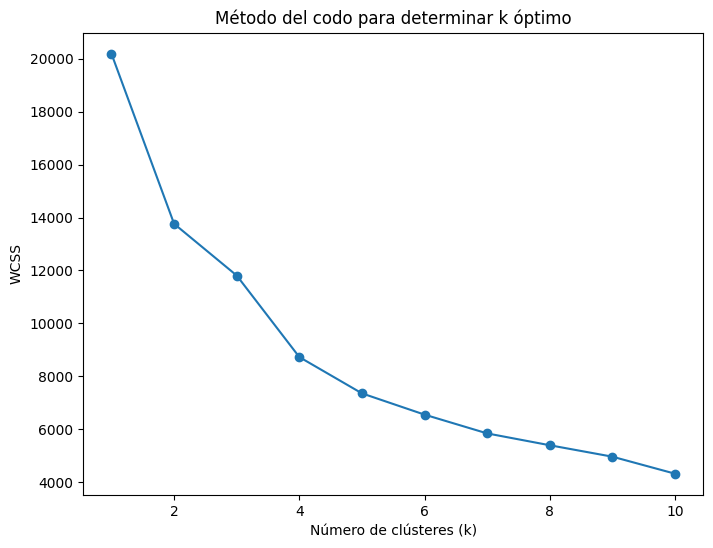

In [37]:
# Calcular el WCSS para diferentes valores de k (1 a 10)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

# Graficar el diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Método del codo para determinar k óptimo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()


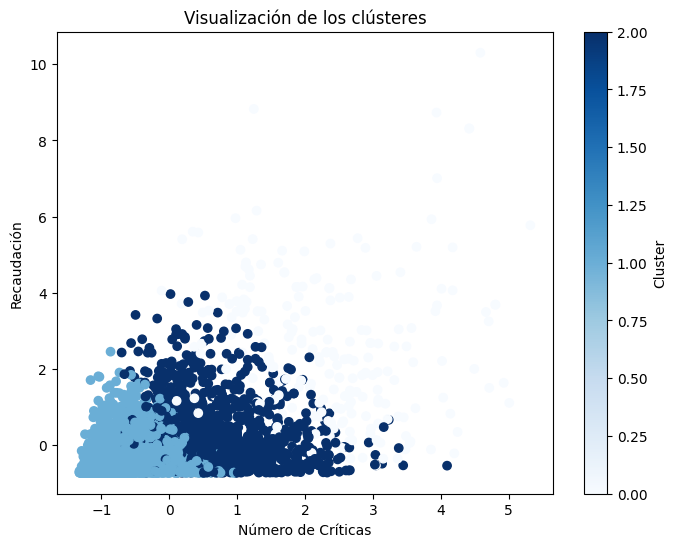

In [38]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_df['num_critic_for_reviews'], data_scaled_df['gross'], c=data_scaled_df['Cluster'], cmap='Blues')
plt.title('Visualización de los clústeres')
plt.xlabel('Número de Críticas')
plt.ylabel('Recaudación')
plt.colorbar(label='Cluster')
plt.show()

# Características principales de cada cluster


1. Cluster 0 Puntos oscuros:
Probablemente películas con bajo presupuesto, pocas críticas, y baja recaudación.
Deben enfocarse en campañas digitales de bajo costo, colaboraciones con influencers
o festivales locales para maximizar la visibilidad, así como en plataformas de streaming

2. Cluster 1 Puntos turquesa:
Películas con presupuesto moderado, recaudación media, y críticas más significativas.
Deben usar promociones en redes sociales combinadas con campañas de lanzamiento en cines regionales.
Segmentar audiencias específicas según género o intereses para optimizar el gasto en publicidad.

3. Cluster 2 Puntos amarillos:
Películas con alto presupuesto, muchas críticas y una recaudación considerable.
Se recomienda invertir en campañas de marketing globales, publicidad masiva
y lanzamientos en eventos internacionales, también aprovechar actores famosos para atraer audiencias.



# **6. Conclusiones**

---


1. Predicción de ingresos: El modelo de regresión lineal ha proporcionado una estimación razonable de los ingresos brutos de una película (gross), aunque su capacidad de ajuste (R² = 0.39) sugiere que existe una cantidad considerable de variabilidad que no es capturada por las variables seleccionadas (presupuesto, duración, puntuación IMDB e interacción en redes sociales). A pesar de esta limitación, el modelo sigue siendo útil para prever el éxito financiero potencial de una película antes de su estreno, lo cual puede ser valioso para estudios y productores al tomar decisiones de inversión.

2. Factores de éxito: A través de la regresión logística, se ha identificado que factores como el presupuesto, la duración, el número de reseñas de usuarios y las críticas tienen un impacto significativo en el éxito de una película, medido en términos de popularidad o retorno financiero. Sorprendentemente, variables como la puntuación IMDB y la interacción en redes sociales (especialmente en Facebook) no mostraron una relación estadísticamente fuerte, lo que podría indicar que el éxito comercial depende más de aspectos de producción y la crítica profesional que de la presencia en redes sociales.

3. Segmentación de películas: El análisis de K-means ha permitido identificar tres segmentos distintos de películas, cada uno con sus propias características definitorias. Esta segmentación facilita la creación de estrategias de marketing más focalizadas y personalizadas para cada tipo de película, lo que podría optimizar las campañas de publicidad y distribución, maximizando el retorno de inversión y mejorando la eficiencia en la promoción de películas.

4. Limitaciones y mejoras: A pesar de los hallazgos, los modelos presentaron limitaciones notables. En particular, la regresión logística mostró una sensibilidad baja, lo que implica que no siempre identifica correctamente las películas que serán exitosas. Esto podría mejorarse incorporando más variables predictoras (como el género, elenco, o la fecha de estreno) y utilizando técnicas más avanzadas de aprendizaje automático, como árboles de decisión o redes neuronales, para mejorar la precisión y la capacidad de predicción de los modelos. Además, la incorporación de más datos de redes sociales y análisis de tendencias podría ser útil para predecir el éxito con mayor fiabilidad.
